# Analyzing Stack Exchange Queries

#### Project Scenario:

In this scenario, you're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

You're tasked with figuring out what is best content to write about. Because you took this course, you know that given the lack of instructions there's some leeway in what "best" means here.

Since you're passionate about helping people learn, you decide to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

Thinking back to your experience when you first started learning programming, it occurs to you that if you wanted to figure out what programming content to write, you could consult [Stack Overflow](https://stackoverflow.com/) and see what kind of content is more popular.

You decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website network called [Stack Exchange](https://datascience.stackexchange.com/).

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and [data science](https://datascience.stackexchange.com/)!

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

In this project I'll be focusing on [DSEE](https://datascience.stackexchange.com/) (=data science).

The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Rawdata

Stack Exchange provides a public data base for each of its websites. [Here's](https://data.stackexchange.com/datascience/query/new) a link to query and explore Data Science Stack Exchange's database.

Due to their low volume, anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to us. We'll then just focus on the questions.

Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. (At the time of writing it is early 2020).

The dataset `2019_questions.csv` is the result of a query against the SEDE DSSE database that extracts the columns:

- `Id`
- `PostTypeId`
- `CreationDate`
- `Score`
- `ViewCount`
- `Tags`
- `AnswerCount`
- `FavoriteCount`

# Reading Rawdata and Exploration

In [3]:
df = pd.read_csv('2019_questions.csv')
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [5]:
df.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

# Data Cleaning:

- `FavoriteCount` has 7432 missing vlaues
- `CreationDate` to datetime64
- `FavoriteCount` to integer
- `Tags` need some tender loving care: replace '<' and '>' with '-'

In [6]:
df = pd.read_csv('2019_questions.csv')
df = df.fillna(0) # fill empty vals with 0
df['CreationDate'] = pd.to_datetime(df['CreationDate']) # set CreatioinDate to datetime
df['FavoriteCount'] = df['FavoriteCount'].astype(int)

# cleaning Tags column:
#df['Tags'] = df['Tags'].str.replace('^<', '').str.replace('>$', ',').str.split('><') # make Tags more easy to deal with

# better solution:
df['Tags'] = (df['Tags'].str.replace(r'<|>$', "", regex = True)# strip first and last angle brackets
                        .str.split('>')  # extremely important: splits the words into individual entries of array
             ) 

df.head()
#df['Tags']

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [8]:
df.isnull().sum()

Id               0
CreationDate     0
Score            0
ViewCount        0
Tags             0
AnswerCount      0
FavoriteCount    0
dtype: int64

## Determining Most Popular Tags

I'l now focus on determining the most popular tags. I'll do so by considering two different popularity proxies: for each tag I am going to count how many times the tag was used, and how many times a question with that tag was viewed

Also, I will check how many times a question with that tag was viewed. 

### How many times was each tag used?

In [9]:
tag_used = df['Tags'].explode('Tags').str.replace(',' , '') # df.explode() will transform each element of a list into new row
#tag_used['Tags'] = tag_used['Tags'].str.replace(',', '')
tag_used = tag_used.value_counts() # count values - how many times each tag was used

#reset index to get tag names as a column and reneame the columns
tag_used = tag_used.reset_index().rename(columns={"index":"Tags", "Tags":"Used"})

# get top 10
top_10_used = tag_used.head(10)
top_10_used

,Tags,Used
0,machine-learning,2693
1,python,1814
2,deep-learning,1220
3,neural-network,1055
4,keras,935
5,classification,685
6,tensorflow,584
7,scikit-learn,540
8,nlp,493
9,cnn,489


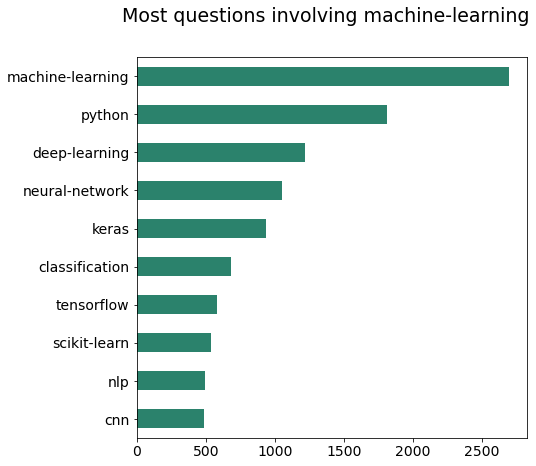

In [10]:
# visualization
fig, ax = plt.subplots(figsize=(7,7))
top_10_used.sort_values("Used").plot.barh(x="Tags", y="Used",legend=False,color="#2b826c",ax=ax)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_ylabel(None)

plt.suptitle("Most questions involving machine-learning", 
             y=0.98, fontsize=19)
plt.show()

### How many times was each tag viewed?

In [11]:
df_views = df[['ViewCount', 'Tags']].copy() # copy relevant dat to new df_views
df_views['Tags_clean'] = (df_views['Tags'].explode('Tags')).str.replace(',' , '') # explode tags and get rid of commas

result = df_views.pivot_table(values = 'ViewCount', index = 'Tags_clean', aggfunc = sum) # pivot table to aggregate data
result = result.sort_values(by='ViewCount', ascending = False) # sort in descending order
result.reset_index(inplace = True) # reset index

# different approach - identical result:
#result_b = (df_views.groupby('Tags_clean'))['ViewCount'].sum().sort_values(ascending = False).reset_index()
#result_b.head(10)

top_10_viewed = result.head(10) # show top 10 most viewed
top_10_viewed

,Tags_clean,ViewCount
0,machine-learning,199363
1,python,116810
2,deep-learning,64144
3,neural-network,63309
4,keras,49768
5,tensorflow,36964
6,time-series,36169
7,outlier,32951
8,classification,31550
9,scikit-learn,28000


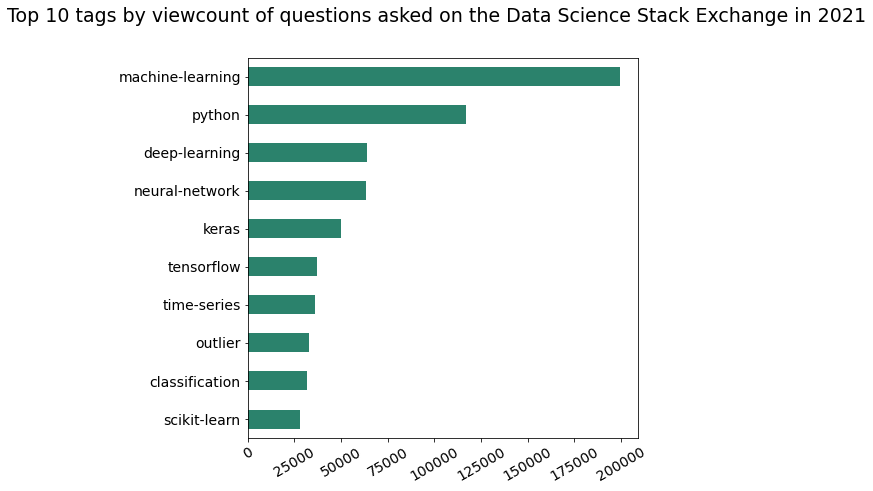

In [12]:
# visualization
fig, ax = plt.subplots(figsize=(7,7))
top_10_viewed.sort_values("ViewCount").plot.barh(x="Tags_clean", y="ViewCount",legend=False,color="#2b826c",ax=ax)

ax.tick_params(axis='both', which='major', labelsize=14) # set ticks to major and adjust labelsize
ax.tick_params(axis='x', rotation = 30) # rotate xlabels
ax.set_ylabel(None)

plt.suptitle("Top 10 tags by viewcount of questions asked on the Data Science Stack Exchange in 2021", 
             y=0.98, fontsize=19)
plt.show()

## Relationships between tags

We know from our exploration of the DSSE site earlier that multiple tags can be (and often are) used in a single post. It could be interesting to see whether some tags are frequently used together, and therefore are probably related to one-another in some way. As an example, looking at the graph of most-viewed tags, we know that pandas and numpy are both Python libraries and so will likely be used with the python tag.

To assess how many times a tag is used with another tag, we'll start by constructing an empty dataframe whereby each unique tag is listed along both the index and column axis.

Essentially I'll create a correlation matrix

In [13]:
unique_tags = list(tag_used['Tags']) # list of unique tags
correlation = pd.DataFrame(index = unique_tags, columns = unique_tags) # empty corr matrix with columns and index as unique_tags
correlation = correlation.fillna(0) # fill na values
correlation.iloc[0:5, 0:5] # display top 5

,machine-learning,python,deep-learning,neural-network,keras
machine-learning,0,0,0,0,0
python,0,0,0,0,0
deep-learning,0,0,0,0,0
neural-network,0,0,0,0,0
keras,0,0,0,0,0


Iterate through each tag in list of tags and calculate correlation for all other tags:
- `correlation.loc[list_of_tags, list_of_tags]` +=1 will ad +1 for each combination of tags in list_of_tags
- list_of_tags is an entry of `df['Tags']`
- thus iterate through `df['Tags']`

In [14]:
# iterate through df['Tags'] and fill correlation matrix
for tag in df['Tags']:
    correlation.loc[tag, tag] += 1
    
# remove diagonal of matrix - as tags matching themselves makes mathematical sense but no logical sense in this context:
for index in correlation.index:
    correlation.loc[index, index] = np.NaN

# concentrate on slice with top 10 used tags
top_10_tags = correlation.loc[top_10_used['Tags'], top_10_used['Tags']]
top_10_tags

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn
machine-learning,NaN,499.0,429.0,366.0,195.0,259.0,106.0,188.0,113.0,124.0
python,499.0,NaN,160.0,137.0,280.0,98.0,167.0,235.0,71.0,62.0
deep-learning,429.0,160.0,NaN,305.0,247.0,59.0,136.0,16.0,72.0,160.0
neural-network,366.0,137.0,305.0,NaN,235.0,65.0,108.0,24.0,24.0,118.0
keras,195.0,280.0,247.0,235.0,NaN,58.0,256.0,34.0,23.0,116.0
classification,259.0,98.0,59.0,65.0,58.0,NaN,20.0,47.0,35.0,20.0
tensorflow,106.0,167.0,136.0,108.0,256.0,20.0,NaN,15.0,11.0,57.0
scikit-learn,188.0,235.0,16.0,24.0,34.0,47.0,15.0,NaN,12.0,0.0
nlp,113.0,71.0,72.0,24.0,23.0,35.0,11.0,12.0,NaN,7.0
cnn,124.0,62.0,160.0,118.0,116.0,20.0,57.0,0.0,7.0,NaN


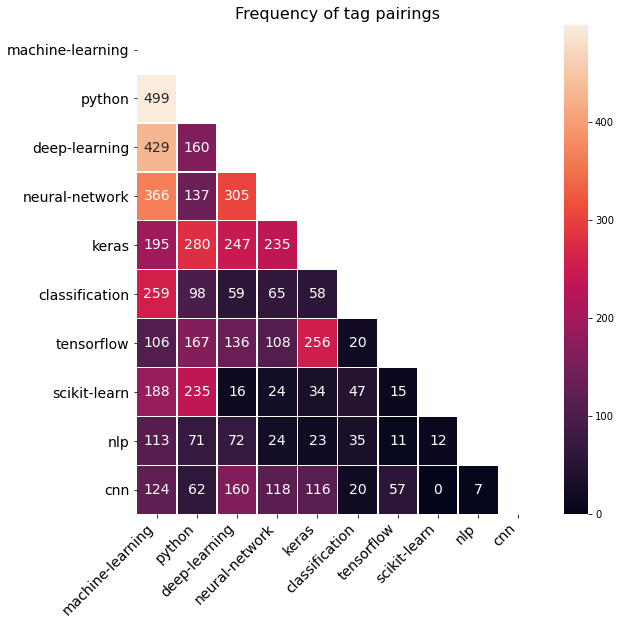

In [15]:
# create a numpy array of zeros matching the dimensions of the top_10 df
mask = np.zeros_like(top_10_tags)
# use triu_indicies to create the indices for the upper-triangle of an the array.
mask[np.triu_indices_from(mask)] = True

## plot heatmap
fig, ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(top_10_tags, 
                 #cmap="Greens", 
                 mask=mask, 
                 annot=True,
                 fmt='g',
                 linewidths=.5,
                 annot_kws={"fontsize":14}) # we can now apply the mask

# set font-size for tick labels and rotate x tick labels
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticklabels(top_10_tags.index, rotation = 45, ha="right")

# title
ax.set_title("Frequency of tag pairings", fontsize=16)

plt.show()

# Is Deep Learning just a Fad?

Before we officially make our recommendation, it would be nice to solidify our findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down? Back to SEDE!

dataset: `all_questions.csv` is the result of the below query:

``` mysql
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```

### Goal: 
- how many deep learning questions are asked per time period?
- total amount of questions per time period?
- how many deep learning questions are there relativ to the total amount of questions per time period?

In [16]:
df_all_questions = pd.read_csv('all_questions.csv', parse_dates=["CreationDate"])
df_all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [17]:
df_all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


## Data Cleaning :

Tags column in similar shape as `2019_questions.csv`

In [18]:
df_all_questions = pd.read_csv('all_questions.csv', parse_dates=["CreationDate"])

# cleaning Tags column:
df_all_questions['Tags'] = (df_all_questions['Tags'].str.replace(r'<|>$', "", regex = True)# strip first and last angle brackets
                                                    .str.split('>')  
                           )
# set CreatioinDate to datetime can be avoided by using parse_dates
#df_all_questions['CreationDate'] = pd.to_datetime(df_all_questions['CreationDate'])
df_all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


In [19]:
df_all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


### Important Domain Knowledge:

In order to progress, I will have to make two assumptions:
- what questions classify as related to deep learning?
    - machine-learning
    - deep-learning
    - neural-network
    - tensorflow
    - scikit-learn
    - predictive-modeling
    - machine-learning-model
    - bayesian-networks
    - tensorflow
    - keras
- during what timeframes do I want to look at deep learning?
 - monthly basis 
 - quarterly basis
 
### Tasks:
- create additional column `deepL`
    - set deepL to 1 if one of the questions above can be found in tags
    - set deepL to 0 if not 

In [20]:
def deep_learning(tag_list, dl_tags):
    '''
    function that finds if one ore more tags in list of tags are in another list of tags
    to be applied to ['Tags'] column of dataframe
    '''
    if any(x in tag_list for x in dl_tags): # check if any of the tags can be found in tagslist
        return 1
    else:
        return 0
    
# list of tags that I deem to be related to deeplearning:
dl_tags = ['machine-learning', 'deep-learning ,neural-networ', 'tensorflow', 'scikit-learn', 
            'predictive-modeling', 'machine-learning-model', 'bayesian-networks', 'tensorflow', 'keras']

# apply function to Tags column and asign to new deepL column
df_all_questions['deepL'] = df_all_questions['Tags'].apply(deep_learning, dl_tags = dl_tags)

# get monthly information of the format yyyymm 
months = df_all_questions['CreationDate'].dt.month # get months
years = df_all_questions['CreationDate'].dt.year # get years
df_all_questions['Months'] = years*100 + months # assign to Months column formatted as yyyymm
df_all_questions['Year'] = years

df_all_questions.head()

,Id,CreationDate,Tags,deepL,Months,Year
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,201902,2019
1,45418,2019-02-12 00:50:39,[neural-network],0,201902,2019
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,201902,2019
3,45426,2019-02-12 04:51:49,[keras],1,201902,2019
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",1,201902,2019


In [21]:
prelim_results = df_all_questions['deepL'].value_counts()
total = prelim_results[1] / sum(prelim_results)
print("{:.2%}".format(total) + ' of all questions are somewhat related to deep learning')

47.38% of all questions are somewhat related to deep learning


In [22]:
# aggregate on months column
df_all_questions_result = df_all_questions.pivot_table(values = ['deepL'], index = ['Months', 'Year'], aggfunc = sum)
df_all_questions_result.reset_index(inplace = True)
df_all_questions_result.head()

,Months,Year,deepL
0,201405,2014,10
1,201406,2014,31
2,201407,2014,24
3,201408,2014,23
4,201409,2014,20


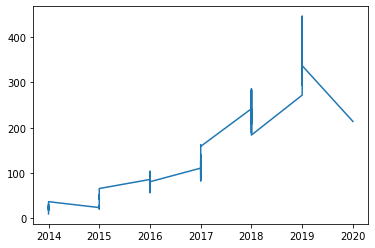

In [23]:
plt.plot(df_all_questions_result['Year'], df_all_questions_result['deepL'])
plt.show()

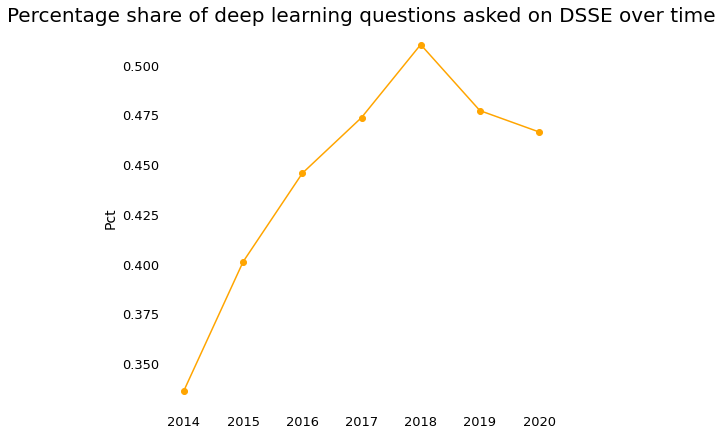

In [24]:
# get mean dl_pct for each year
year_avg_dl_pct = df_all_questions.groupby("Year")["deepL"].mean()

# plot graph
fig, ax = plt.subplots(figsize=(7,7))
year_avg_dl_pct.plot(x="Year", y='deepL', 
                     c="orange",
                     marker="o",
                     ax=ax)

ax.set_title("Percentage share of deep learning questions asked on DSSE over time",
             fontsize=20)

# remove spines
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
    
# remove ticks
ax.tick_params(left=False, bottom=False)

#ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# adjust tick label size
ax.tick_params(axis='both', which='major', labelsize=13)

# set y labels, hide x label
ax.set_ylabel('Pct', size=14)
ax.set_xlabel('')

plt.show()

# Conclusion

- The share deeplearning questions has drastically increased between 2014 and 2018 (from less than 30% to more than 50% of all questions asked)
- Since 2018 the share of questions seems to have declined ot about 47%